### PCA 개요 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

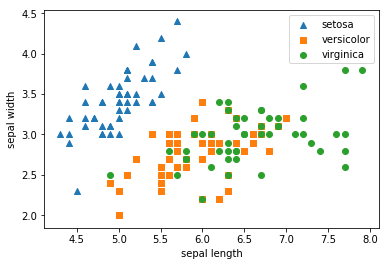

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers): 
##enumerate인덱스 값을 포함하는 객체 리턴
##for 문에서 문자 2개 지정 가능
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])
    

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
x_axis_data

100    6.3
101    5.8
102    7.1
103    6.3
104    6.5
105    7.6
106    4.9
107    7.3
108    6.7
109    7.2
110    6.5
111    6.4
112    6.8
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, dtype: float64

In [4]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [6]:
from sklearn.decomposition import PCA

pca = PCA().fit(iris_scaled)
np.cumsum(pca.explained_variance_ratio_) 
##람다값들의 누적합 인데 각각의 람다 값이 설명력을 얘기함
##람다1 과 람다2의 누적합이 0.95가 넘기 때문에 2개로 축소하면 되겠다

array([0.76740358, 0.95023085, 0.98747608, 0.9958933 , 1.        ])

In [7]:


pca = PCA(n_components=2)
##n_components: 인스턴스의 속성 개수

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

##pca 는 분산을 최대한 보존하면서 새로운 기저를 찾아서 저차원으로 바꾸는것


(150, 2)


In [8]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

pca_component_1  pca_component_2  target
0        -2.576120         0.474499       0
1        -2.415322        -0.678092       0
2        -2.659333        -0.348282       0

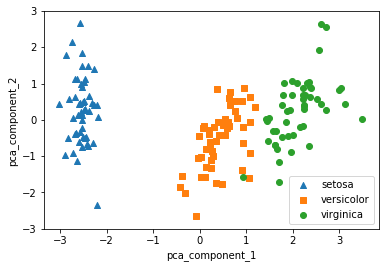

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

##그림 보면 분산 유지된 채로 같은 그룹끼리 표현됨

In [10]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
##cross_val_core(model, train, target, cross validation) 형태
##train_test)split 과 비교해보면
##train_test_split 은 무작위로 나눔(훈련세트=분류하기어려운샘플, 테스트세트=분류하기쉬운샘플)
##교차검증은 테스트세트에 각 샘플이 정확하게 한번씩 들어가고, 각 폴드는 한번씩 테스트 세트가 됨
##단점) 연산 비용이 늘어남
print(scores)

[0.98039216 0.92156863 1.        ]


In [16]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)
##pca 했을떄 정확도가 더 높게 나옴

[0.98039216 0.96078431 1.        ]
